In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<AxesSubplot:>

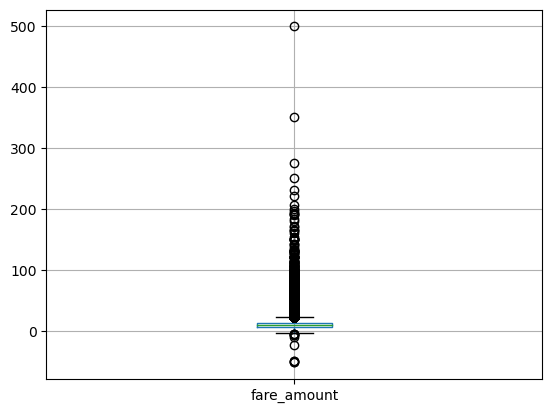

In [6]:
col=['fare_amount']
df.boxplot(col)

In [8]:
#correlation
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


# Linear Regression

In [9]:
X=df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]]
Y=df['fare_amount']
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.999817,40.738354,-73.999512,40.723217
1,-73.994355,40.728225,-73.994710,40.750325
2,-74.005043,40.740770,-73.962565,40.772647
3,-73.976124,40.790844,-73.965316,40.803349
4,-73.925023,40.744085,-73.973082,40.761247
...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297
199996,-73.984722,40.736837,-74.006672,40.739620
199997,-73.986017,40.756487,-73.858957,40.692588
199998,-73.997124,40.725452,-73.983215,40.695415


In [10]:
Y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199999, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
118668,-73.983942,40.764828,-73.994297,40.694715
89564,-74.006690,40.738802,-73.953322,40.710982
127179,-73.996712,40.747672,-73.975074,40.777435
33810,-73.967598,40.755900,-73.992388,40.719637
94017,-73.975357,40.754284,-73.963104,40.772083
...,...,...,...,...
26782,-73.979150,40.761772,-73.974008,40.792263
197758,-73.974236,40.756847,-73.983231,40.760418
164671,-73.984546,40.724573,-73.956190,40.713900
128703,-73.781830,40.644940,-73.996935,40.738240


In [12]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
81164,-73.977915,40.753590,-74.009515,40.723525
119691,-73.999996,40.727079,-74.001059,40.739204
111489,-73.963516,40.775169,-73.974824,40.765129
53590,-74.015447,40.711372,-73.994775,40.736510
50962,-73.964192,40.777154,-73.977588,40.749432
...,...,...,...,...
4137,-73.990805,40.745495,-73.987118,40.753535
91862,-73.983013,40.771798,-73.967216,40.769314
137116,-73.979944,40.748804,-73.966719,40.761778
95847,-73.980980,40.752115,-73.998120,40.734182


In [13]:
Y_train

118668    17.3
89564     18.5
127179     9.5
33810      8.9
94017      9.0
          ... 
26782     10.1
197758     6.0
164671    15.7
128703    52.0
145606     8.5
Name: fare_amount, Length: 139999, dtype: float64

In [14]:
Y_test

81164     12.1
119691     5.3
111489     6.0
53590     10.5
50962      8.9
          ... 
4137       5.5
91862      6.0
137116     5.7
95847     11.0
98749     51.0
Name: fare_amount, Length: 60000, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
prediction=lr.predict(X_test)

In [16]:
prediction

array([11.32468187, 11.32427954, 11.32381434, ..., 11.32376522,
       11.32441719, 11.32295066])

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators = 5, random_state = 101) #n_estimators is no of decision tree
rf.fit(X_train,Y_train)
prediction_rf=rf.predict(X_test)

In [18]:
prediction_rf

array([16.24 ,  6.28 ,  6.22 , ...,  6.5  ,  8.48 , 32.486])

# RMSE

In [19]:
from sklearn.metrics import mean_squared_error
rmse_lr=np.sqrt(mean_squared_error(prediction,Y_test))
rmse_rf=np.sqrt(mean_squared_error(prediction_rf,Y_test))
rmse_lr

10.072352532136147

In [20]:
rmse_rf

5.3539923918768055